<a href="https://colab.research.google.com/github/jtlai0921/-/blob/master/keras_01basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Flatten, Input, Activation
import numpy as np
import matplotlib.pyplot as plt

num_classes = 10
img_size = 28

In [ ]:
!nvidia-smi #GPU

Thu Oct 29 11:55:19 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)
1


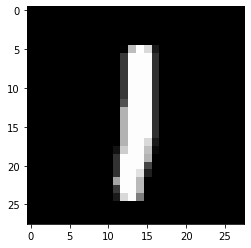

In [ ]:
# Prepare Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# Plot image and label
idx = 5566
plt.imshow(x_test[idx], cmap=plt.cm.gray)
print(y_test[idx])

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
x_train = x_train.reshape(x_train.shape[0], -1) # 60000, 28*28
x_test = x_test.reshape(x_test.shape[0], -1) # 10000, 28*28

# normalization 0~1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# one hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

In [ ]:
y_train[3]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# 1
inputs = Input(shape=(img_size*img_size,))
x = Dense(units=64, activation='relu')(inputs)
x = Dense(128, activation=keras.activations.relu)(x)
prediction = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=inputs, outputs=prediction)

In [ ]:
# 2
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(img_size*img_size,)))
model.add(Dense(units=128))
model.add(Activation('relu'))
model.add(Dense(units=128))
model.add(Activation('relu'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy', keras.losses.mse])

In [ ]:
logs = model.fit(x_train, y_train,
                batch_size=128,
                epochs=20,
                verbose=1,
                validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3717 - accuracy: 0.8942 - mean_squared_error: 0.0164 - val_loss: 0.1895 - val_accuracy: 0.9431 - val_mean_squared_error: 0.0086
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1530 - accuracy: 0.9549 - mean_squared_error: 0.0070 - val_loss: 0.1332 - val_accuracy: 0.9598 - val_mean_squared_error: 0.0061
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1114 - accuracy: 0.9663 - mean_squared_error: 0.0052 - val_loss: 0.1092 - val_accuracy: 0.9659 - val_mean_squared_error: 0.0051
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0878 - accuracy: 0.9736 - mean_squared_error: 0.0041 - val_loss: 0.1019 - val_accuracy: 0.9677 - val_mean_squared_error: 0.0047
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0711 - accuracy: 0.9787 - mean_squared_error: 0.0033 - val_loss: 0.0936 - val_accuracy: 0.9707 - val_mean_sq

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'test loss: {score[0]}, test acc: {score[1]}')
score

test loss: 0.09054161608219147, test acc: 0.9781000018119812


[0.09054161608219147, 0.9781000018119812, 0.003471680451184511]

In [ ]:
prediction = model.predict(x_test[:1])
print(prediction)
print(np.argmax(prediction, axis=-1))

[[8.83679618e-09 4.32575220e-09 1.43872853e-07 2.15839668e-06
  6.38142794e-12 3.42705309e-09 1.28154586e-14 9.99996781e-01
  2.08649364e-09 9.24365111e-07]]
[7]


In [ ]:
history = logs.history
history

{'accuracy': [0.8941500186920166,
  0.9549166560173035,
  0.9662666916847229,
  0.9736166596412659,
  0.9786999821662903,
  0.9803333282470703,
  0.984083354473114,
  0.986299991607666,
  0.9882166385650635,
  0.989883303642273,
  0.9907500147819519,
  0.9922333359718323,
  0.9939000010490417,
  0.9942333102226257,
  0.9947999715805054,
  0.9949333071708679,
  0.9952333569526672,
  0.9964333176612854,
  0.9972000122070312,
  0.9958333373069763],
 'loss': [0.37170687317848206,
  0.15296585857868195,
  0.11140254884958267,
  0.08780109137296677,
  0.07109860330820084,
  0.06195256486535072,
  0.051733434200286865,
  0.04440447688102722,
  0.03790311515331268,
  0.032372865825891495,
  0.029866233468055725,
  0.024876846000552177,
  0.020515400916337967,
  0.01877748966217041,
  0.0167508777230978,
  0.01620948128402233,
  0.014577423222362995,
  0.012196020223200321,
  0.008985272608697414,
  0.013403481803834438],
 'mean_squared_error': [0.016364941373467445,
  0.006958803161978722,
  0

Text(0.5, 1.0, 'accuracy')

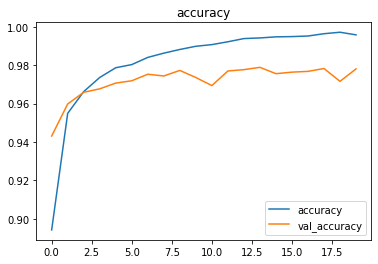

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

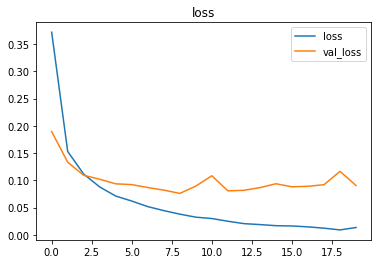

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_true = np.argmax(y_test, axis=-1)
y_pred = np.argmax(model.predict(x_test), axis=-1)
print(y_true.shape, y_pred.shape)

target_names = [str(i) for i in range(10)]
print(classification_report(y_true, y_pred, target_names=target_names))
print(confusion_matrix(y_true, y_pred)) # row: Truth, col: pred


(10000,) (10000,)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.97      0.97      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 968    1    1    1    1    3    3    1    1    0]
 [   0 1126    0    0    0    0    2    0    7    0]
 [   5    3 1004    6    1    1    1    3    8    0]
 [   0    2    5  982    0    7    1    2    6    5]
 [   1    0

## Save Model

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
prediction = model.predict(x_test[:1])
print(prediction)

model.save('/content/drive/My Drive/my_model.h5')

del model
model = load_model('/content/drive/My Drive/my_model.h5')
prediction = model.predict(x_test[:1])
print(prediction)

[[8.83679618e-09 4.32575220e-09 1.43872853e-07 2.15839668e-06
  6.38142794e-12 3.42705309e-09 1.28154586e-14 9.99996781e-01
  2.08649364e-09 9.24365111e-07]]
[[8.83679618e-09 4.32575220e-09 1.43872853e-07 2.15839668e-06
  6.38142794e-12 3.42705309e-09 1.28154586e-14 9.99996781e-01
  2.08649364e-09 9.24365111e-07]]


In [ ]:
#model = load_model('/content/drive/My Drive/my_model.h5')
# save and load weights only
model.save_weights('/content/drive/My Drive/my_model_weights.h5')

# reconstruct model before load weights
model.load_weights('/content/drive/My Drive/my_model_weights.h5')